# Pokemon
**Information about datasets** 

This project was built using 2 datasets. The first dataset included a list of all pokemon from generation 1 through 6 with their basic information. The second data set contains combat outcomes of fights between different pokemon.

**Questions I want to answer:**
1) What's the type of the most common pokemon

2) Which pokemon type wins the most battles? What is it the weakest against?

3) What's the best rounded pokemon

4) What's the pokemon that wins the most? What type is it weakest against? What pokemon is it weakest against?

5) If I were up against a team of 6 pokemon, what's the likelihood of its composition? What team should I have?

6) If I were to play pokemon, which type of pokemon should I start with?

**Structure**
1) Explore data 

2) Transform data 

3) Visualize data 

4) Conclusions

**Libaries I will be using**

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns

**1) explore data**


In [2]:
pokemon=pd.read_csv('pokemon.csv')
combat=pd.read_csv('combats.csv')

**Pokemon dataset**

In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [4]:
pd.value_counts(pokemon.dtypes)

int64     8
object    3
bool      1
dtype: int64

In [5]:
# Display all features
pokemon.sample(5)

#        Name  Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
695  696    Zweilous    Dark  Dragon  72      85       70       65       70   
27    28      Fearow  Normal  Flying  65      90       65       61       61   
242  243   Octillery   Water     NaN  75     105       75      105       75   
345  346      Gulpin  Poison     NaN  70      43       53       43       53   
583  584  Roggenrola    Rock     NaN  55      75       85       25       25   

     Speed  Generation  Legendary  
695     58           5      False  
27     100           1      False  
242     45           2      False  
345     40           3      False  
583     15           5      False

In [6]:
# Display non-numerical features to see if theres any numerical feature as non-numerical
pokemon.select_dtypes(exclude="number").sample(5)

Name    Type 1  Type 2  Legendary
48      Oddish     Grass  Poison      False
298    Shiftry     Grass    Dark      False
645  Vanilluxe       Ice     NaN      False
187     Cleffa     Fairy     NaN      False
31      Raichu  Electric     NaN      False

In [7]:
# All non-numerical features are properly marked, no errors here

In [8]:
# Macro summary of non-numerical features
pokemon.describe(exclude="number")

Name Type 1  Type 2 Legendary
count         800    800     414       800
unique        800     18      18         2
top     Bulbasaur  Water  Flying     False
freq            1    112      97       735

In [9]:
# Macro summary of numerical features
# pokemon.describe(include="number", percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
pokemon.describe()

#          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    400.5000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    600.2500   80.000000  100.000000   90.000000   95.000000   90.000000   
max    800.0000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6.00000

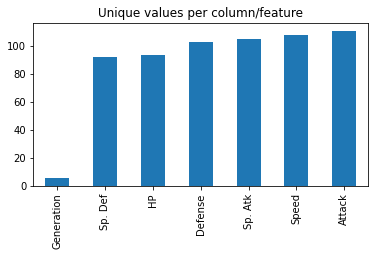

In [10]:
# Number of unique values per column/feature for numerical data types
unique_values=pokemon.drop(["#"],axis=1).select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(figsize=(6,3), title="Unique values per column/feature")
plt.show()

In [11]:
# Detecting duplicates
n_duplicates=pokemon.drop(["#"],axis=1).duplicated().sum()
print("The pokemon data set has "+str(n_duplicates)+" duplicates")

The pokemon data set has 0 duplicates


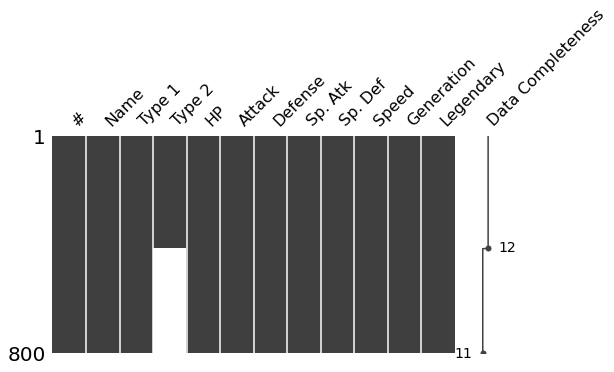

In [12]:
# Detecting missing values in data set
# plt.figure(figsize=(5, 5))
# plt.imshow(pokemon.isna(), aspect="auto", interpolation="nearest", cmap="gray")
# plt.xlabel("Column Number")
# plt.ylabel("Sample Number")

# Shorter way to visualize missing values
msno.matrix(pokemon, labels=True, sort="descending",figsize=(8, 4))
plt.show()

In [13]:
# percentage of missing values in each column
pokemon.isna().mean()

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

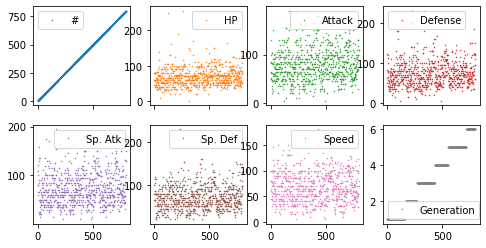

In [14]:
pokemon.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(8, 4), markersize=1)
plt.show()

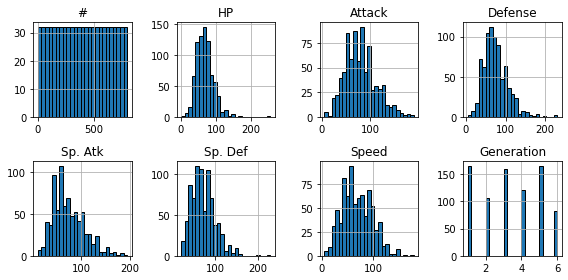

In [15]:
pokemon.hist(bins=25, figsize=(8, 4), layout=(-1, 4), edgecolor="black")
plt.tight_layout()

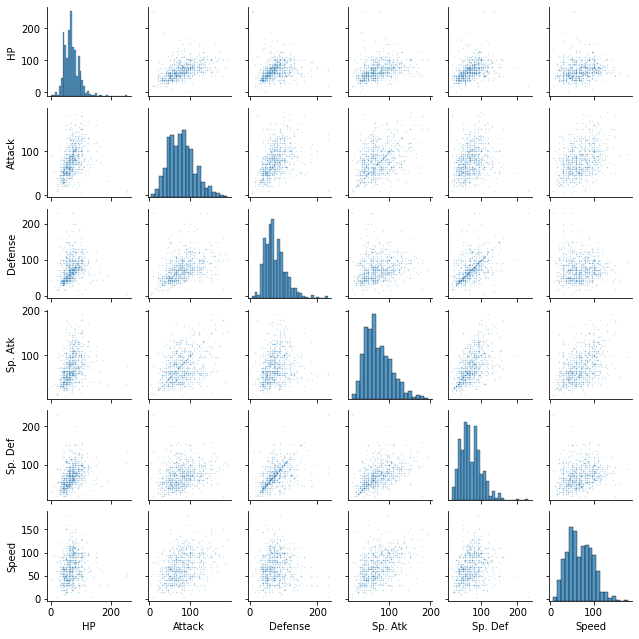

In [16]:
sns.pairplot(pokemon.drop(["#","Legendary", "Generation"], axis=1), height=1.5, plot_kws={"s": 2, "alpha": 0.2})
plt.show()

In [17]:
pokemon_corr=pokemon.drop(["#","Generation","Legendary"],axis=1).corr()
pokemon_corr

HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.175952  0.381240  0.015227  0.473018  0.259133  1.000000

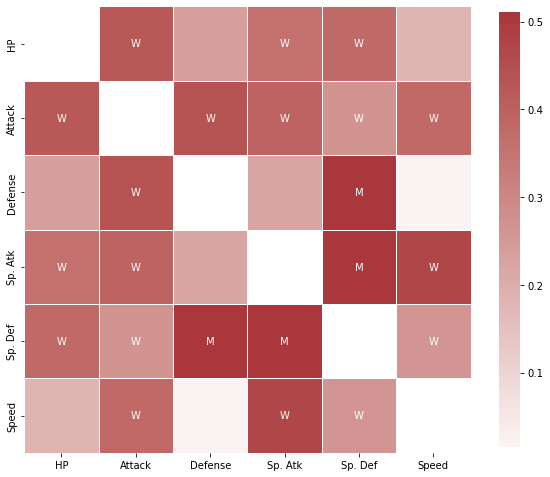

In [18]:
# Create labels for the correlation matrix
labels = np.where(np.abs(pokemon_corr)>0.75, "S",
                  np.where(np.abs(pokemon_corr)>0.5, "M",
                           np.where(np.abs(pokemon_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(pokemon_corr, mask=np.eye(len(pokemon_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

**Combat dataset**

In [19]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [20]:
pd.value_counts(combat.dtypes)

int64    3
dtype: int64

In [21]:
combat.sample(5)

First_pokemon  Second_pokemon  Winner
42900              8             333       8
36265             89             392     392
29325            406             234     234
30204            493             623     623
37829            106             257     257

**2) Transform data**

**Modify datasets in order to be able to answers the questions asked**

In [22]:
# Modify combat data set to include types
combat=combat.merge(pokemon[["#","Type 1"]], left_on="First_pokemon", right_on="#", how="left").drop(columns="#").rename(columns={"Type 1":"First_pokemon_type"})

In [23]:
combat=combat.merge(pokemon[["#","Type 1"]], left_on="Second_pokemon", right_on="#", how="left").drop(columns="#").rename(columns={"Type 1":"Second_pokemon_type"})

In [24]:
combat=combat.merge(pokemon[["#","Type 1"]], left_on="Winner", right_on="#", how="left").drop(columns="#").rename(columns={"Type 1":"Winner_pokemon_type"})

In [25]:
# Combat data set has initial changes with combat information and types
print(combat.shape)
combat.head(5)

(50000, 6)


First_pokemon  Second_pokemon  Winner First_pokemon_type  \
0            266             298     298               Rock   
1            702             701     701              Grass   
2            191             668     668              Fairy   
3            237             683     683               Fire   
4            151             231     151               Rock   

  Second_pokemon_type Winner_pokemon_type  
0               Grass               Grass  
1                Rock                Rock  
2             Psychic             Psychic  
3              Dragon              Dragon  
4                 Bug                Rock

In [26]:
# Check if merge was done correctly
print(pokemon.head(2))
combat.loc[(combat["First_pokemon"]==1)|(combat["Second_pokemon"]==1)]

   #       Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0  1  Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1  2    Ivysaur  Grass  Poison  60      62       63       80       80     60   

   Generation  Legendary  
0           1      False  
1           1      False  


First_pokemon  Second_pokemon  Winner First_pokemon_type  \
426                1             679     679              Grass   
442              732               1     732               Fire   
480              441               1     441              Water   
995                1             687     687              Grass   
1040               1             557     557              Grass   
...              ...             ...     ...                ...   
48539            733               1       1                Bug   
48696              1             217     217              Grass   
48716              1             346       1              Grass   
48741            522               1     522              Grass   
49339              1             227     227              Grass   

      Second_pokemon_type Winner_pokemon_type  
426                   Bug                 Bug  
442                 Grass                Fire  
480                 Grass               Water  
995                  Dark                Dark  
1040                Grass               Grass  
...                   ...                 ...  
48539               Grass               Grass  
48696             Psychic             Psychic  
48716              Poison               Grass  
48741               Grass               Grass  
49339               Fairy               Fairy  

[133 rows x 6 columns]

In [27]:
# Verifying if combat information has duplicates
# combat.duplicated()
print(str(combat.duplicated().sum())+" duplicates will remain in order to simulate battle scenarios")

1952 duplicates will remain in order to simulate battle scenarios


In [28]:
# All battles that any pokemon fought
all_battles=pd.concat([combat["First_pokemon"],combat["Second_pokemon"]],ignore_index=True).to_frame(name="all_pokemon_battles")
all_battles=all_battles.groupby(by=["all_pokemon_battles"]).agg({"all_pokemon_battles":"count"}).rename(columns={"all_pokemon_battles":"battles_fought"})
all_battles=all_battles.rename_axis("pokemon_id")
all_battles

battles_fought
pokemon_id                
1                      133
2                      121
3                      132
4                      125
5                      112
...                    ...
796                    105
797                    131
798                    119
799                    144
800                    121

[784 rows x 1 columns]

In [29]:
# All battles that any pokemon won
winner_battles=combat.groupby(by=["Winner"]).agg({"Winner":"count"}).rename(columns={"Winner":"winner_of_battles"})
winner_battles=winner_battles.rename_axis("pokemon_id")
winner_battles

winner_of_battles
pokemon_id                   
1                          37
2                          46
3                          89
4                          70
5                          55
...                       ...
796                        39
797                       116
798                        60
799                        89
800                        75

[783 rows x 1 columns]

In [30]:
# Join both df to obtain winner percentage
pokemon_w_perc=all_battles.merge(winner_battles, on="pokemon_id", how="outer")
pokemon_w_perc["winning_percentage"]=pokemon_w_perc["winner_of_battles"]/pokemon_w_perc["battles_fought"]
pokemon_w_perc

battles_fought  winner_of_battles  winning_percentage
pokemon_id                                                       
1                      133               37.0            0.278195
2                      121               46.0            0.380165
3                      132               89.0            0.674242
4                      125               70.0            0.560000
5                      112               55.0            0.491071
...                    ...                ...                 ...
796                    105               39.0            0.371429
797                    131              116.0            0.885496
798                    119               60.0            0.504202
799                    144               89.0            0.618056
800                    121               75.0            0.619835

[784 rows x 3 columns]

In [31]:
# Merge data sets to obtain pokemon winning percentage
pokemon_adj=pokemon.copy().merge(pokemon_w_perc, left_on="#", right_on="pokemon_id", how="left")

In [32]:
# Check data set for pokemon with missing information
pokemon_adj.loc[pokemon_adj.isna()["winning_percentage"]==True]

#                  Name    Type 1   Type 2   HP  Attack  Defense  \
11    12             Blastoise     Water      NaN   79      83      100   
32    33             Sandshrew    Ground      NaN   50      75       85   
45    46            Wigglytuff    Normal    Fairy  140      70       45   
65    66               Poliwag     Water      NaN   40      50       40   
77    78            Victreebel     Grass   Poison   80     105       65   
89    90              Magneton  Electric    Steel   50      60       95   
143  144                 Ditto    Normal      NaN   48      48       48   
182  183               Ariados       Bug   Poison   70      90       70   
230  231               Shuckle       Bug     Rock   20      10      230   
235  236              Ursaring    Normal      NaN   90     130       75   
321  322              Hariyama  Fighting      NaN  144     120       60   
418  419           Mega Latias    Dragon  Psychic   80     100      120   
478  479             Honchkrow      Dark   Flying  100     125       52   
555  556               Servine     Grass      NaN   60      60       75   
617  618              Maractus     Grass      NaN   75      86       67   
654  655             Jellicent     Water    Ghost  100      60       70   
781  782  Pumpkaboo Small Size     Ghost    Grass   44      66       70   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  battles_fought  \
11        85      105     78           1      False             NaN   
32        20       30     40           1      False             NaN   
45        85       50     45           1      False             NaN   
65        40       40     90           1      False             NaN   
77       100       70     70           1      False             NaN   
89       120       70     70           1      False             NaN   
143       48       48     48           1      False             NaN   
182       60       60     40           2      False             NaN   
230       10      230      5           2      False           135.0   
235       75       75     55           2      False             NaN   
321       40       60     50           3      False             NaN   
418      140      150    110           3       True             NaN   
478      105       52     71           4      False             NaN   
555       60       75     83           5      False             NaN   
617      106       67     60           5      False             NaN   
654       85      105     60           5      False             NaN   
781       44       55     56           6      False             NaN   

     winner_of_battles  winning_percentage  
11                 NaN                 NaN  
32                 NaN                 NaN  
45                 NaN                 NaN  
65                 NaN                 NaN  
77                 NaN                 NaN  
89                 NaN                 NaN  
143                NaN                 NaN  
182                NaN                 NaN  
230                NaN                 NaN  
235                NaN                 NaN  
321                NaN                 NaN  
418                NaN                 NaN  
478                NaN                 NaN  
555                NaN                 NaN  
617                NaN                 NaN  
654                NaN                 NaN  
781                NaN                 NaN

In [33]:
# Drop all na that didnt fight in any battles
pokemon_adj=pokemon_adj.dropna(subset=["battles_fought"])
pokemon_adj.loc[pokemon_adj.isna()["winning_percentage"]==True]

#     Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
230  231  Shuckle    Bug   Rock  20      10      230       10      230      5   

     Generation  Legendary  battles_fought  winner_of_battles  \
230           2      False           135.0                NaN   

     winning_percentage  
230                 NaN

In [34]:
# Replace na values with proper one, in this case 0
pokemon_adj=pokemon_adj.fillna({"winner_of_battles":0,"winning_percentage":0})
print(pokemon_adj.isna().mean())
print(pokemon_adj.shape)

#                     0.000000
Name                  0.000000
Type 1                0.000000
Type 2                0.482143
HP                    0.000000
Attack                0.000000
Defense               0.000000
Sp. Atk               0.000000
Sp. Def               0.000000
Speed                 0.000000
Generation            0.000000
Legendary             0.000000
battles_fought        0.000000
winner_of_battles     0.000000
winning_percentage    0.000000
dtype: float64
(784, 15)


In [35]:
# Correlation to see if theres any relationship between variables
pokemon_adj_corr=pokemon_adj.drop(columns=["#","Generation","Legendary","battles_fought","winner_of_battles"]).corr()
pokemon_adj_corr

HP    Attack   Defense   Sp. Atk   Sp. Def  \
HP                  1.000000  0.420464  0.248069  0.366261  0.385570   
Attack              0.420464  1.000000  0.442344  0.398339  0.265884   
Defense             0.248069  0.442344  1.000000  0.221042  0.508399   
Sp. Atk             0.366261  0.398339  0.221042  1.000000  0.503077   
Sp. Def             0.385570  0.265884  0.508399  0.503077  1.000000   
Speed               0.183813  0.385933  0.011475  0.473344  0.254372   
winning_percentage  0.261602  0.502825  0.114565  0.481445  0.302422   

                       Speed  winning_percentage  
HP                  0.183813            0.261602  
Attack              0.385933            0.502825  
Defense             0.011475            0.114565  
Sp. Atk             0.473344            0.481445  
Sp. Def             0.254372            0.302422  
Speed               1.000000            0.938055  
winning_percentage  0.938055            1.000000

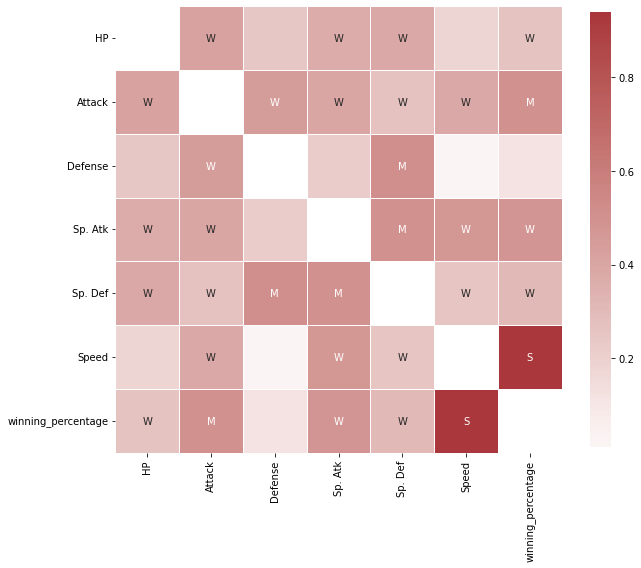

In [38]:
# Create labels for the correlation matrix
labels = np.where(np.abs(pokemon_adj_corr)>0.75, "S",
                  np.where(np.abs(pokemon_adj_corr)>0.5, "M",
                           np.where(np.abs(pokemon_adj_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(pokemon_adj_corr, mask=np.eye(len(pokemon_adj_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [39]:
# Winning percentage per type
# This df doesnt make a differnce between dark vs. bug or bug vs.dark when for the purpose of the analisis is the same
# Use this df for the actual df wanted for the analisis
type_battle_outcome=combat.groupby(by=["First_pokemon_type","Second_pokemon_type","Winner_pokemon_type"], 
                                   as_index=False).agg({"First_pokemon":"count"}).rename(columns={"First_pokemon":"winner_of_battles"})
type_battle_outcome

First_pokemon_type Second_pokemon_type Winner_pokemon_type  \
0                  Bug                 Bug                 Bug   
1                  Bug                Dark                 Bug   
2                  Bug                Dark                Dark   
3                  Bug              Dragon                 Bug   
4                  Bug              Dragon              Dragon   
..                 ...                 ...                 ...   
614              Water                Rock                Rock   
615              Water                Rock               Water   
616              Water               Steel               Steel   
617              Water               Steel               Water   
618              Water               Water               Water   

     winner_of_battles  
0                  386  
1                   65  
2                  101  
3                   47  
4                  119  
..                 ...  
614                164  
615                200  
616                105  
617                129  
618                971  

[619 rows x 4 columns]

In [40]:
pokemon_types=np.unique(pokemon["Type 1"]).tolist()
pokemon_types

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [41]:
# Building df that count type fighting scenario independently if type is in column "First_pokemon_type" or "Second_pokemon_type"
# If not build this way for pd (bug vs. dark) is different of (dark vs.bug)

type_pokemon_combat_outcomes={"type_first_pokemon":[],"type_second_pokemon":[],"type_battles_won":[],"type_battles_fought":[]}
x=0
y=0
for a in pokemon_types:
    for b in pokemon_types:
        if a==b:
            for index in type_battle_outcome.loc[(type_battle_outcome["First_pokemon_type"]==a
                                                 )&(type_battle_outcome["Second_pokemon_type"]==a)].index:
                x=x+type_battle_outcome["winner_of_battles"][index]
                y=y+type_battle_outcome["winner_of_battles"][index]
        else:
            for index in type_battle_outcome.loc[((type_battle_outcome["First_pokemon_type"]==a)|(type_battle_outcome["Second_pokemon_type"]==a))&
       ((type_battle_outcome["First_pokemon_type"]==b)|(type_battle_outcome["Second_pokemon_type"]==b))].index:
                x=x+type_battle_outcome["winner_of_battles"][index]
                if type_battle_outcome["Winner_pokemon_type"][index]==a:
                    y=y+type_battle_outcome["winner_of_battles"][index]
        type_pokemon_combat_outcomes["type_first_pokemon"].append(a)
        type_pokemon_combat_outcomes["type_second_pokemon"].append(b)
        type_pokemon_combat_outcomes["type_battles_won"].append(y)
        type_pokemon_combat_outcomes["type_battles_fought"].append(x)
        x=0
        y=0

In [42]:
type_combat_outcome=pd.DataFrame(type_pokemon_combat_outcomes)
type_combat_outcome["type_winning_percentage"]=(type_combat_outcome["type_battles_won"]/
                                                type_combat_outcome["type_battles_fought"])
type_combat_outcome

type_first_pokemon type_second_pokemon  type_battles_won  \
0                  Bug                 Bug               386   
1                  Bug                Dark               112   
2                  Bug              Dragon                97   
3                  Bug            Electric               126   
4                  Bug               Fairy               116   
..                 ...                 ...               ...   
319              Water              Poison               283   
320              Water             Psychic               417   
321              Water                Rock               448   
322              Water               Steel               307   
323              Water               Water               971   

     type_battles_fought  type_winning_percentage  
0                    386                 1.000000  
1                    309                 0.362460  
2                    342                 0.283626  
3                    473                 0.266385  
4                    190                 0.610526  
..                   ...                      ...  
319                  518                 0.546332  
320                 1086                 0.383978  
321                  759                 0.590250  
322                  497                 0.617706  
323                  971                 1.000000  

[324 rows x 5 columns]

In [43]:
global_type_combat=type_combat_outcome.groupby(by=["type_first_pokemon"]).agg({"type_battles_won":"sum","type_battles_fought":"sum"})
global_type_combat["winning_percentage"]=global_type_combat["type_battles_won"]/global_type_combat["type_battles_fought"]
global_type_combat                                                                         

type_battles_won  type_battles_fought  winning_percentage
type_first_pokemon                                                           
Bug                             3772                 8374            0.450442
Dark                            2447                 3771            0.648899
Dragon                          2490                 3857            0.645579
Electric                        3370                 5212            0.646585
Fairy                            707                 2126            0.332549
Fighting                        1543                 3241            0.476088
Fire                            3802                 6337            0.599968
Flying                           362                  477            0.758910
Ghost                           1877                 3825            0.490719
Grass                           3707                 8072            0.459242
Ground                          2088                 3817            0.547026
Ice                             1357                 3032            0.447559
Normal                          6518                11390            0.572256
Poison                          1571                 3580            0.438827
Psychic                         3998                 7061            0.566209
Rock                            2299                 5512            0.417090
Steel                           1523                 3473            0.438526
Water                           6569                13070            0.502601

**3) Visualize data**

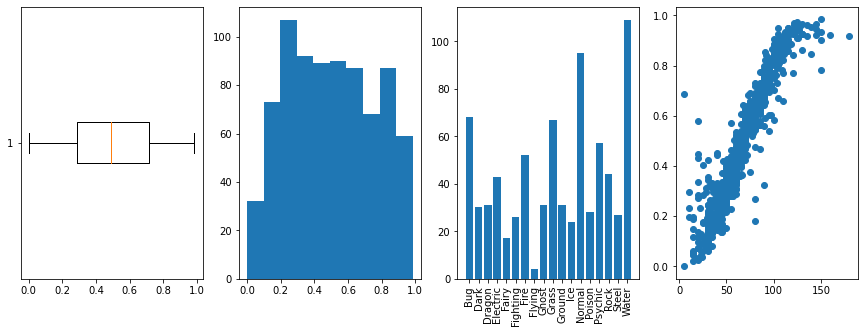

In [44]:
# Subplot - para crear varias graficas en una linea de cogido, funciona con (filas, columns, indice) solo debo especificar
# donde estoy trabajando

a=pokemon_adj["winning_percentage"]
b=pokemon_adj["Type 1"]
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.boxplot(a, vert=False)
plt.subplot(1,4,2)
plt.hist(a)
plt.subplot(1,4,3)
c=pokemon_adj.groupby(by=["Type 1"], as_index=False).agg({"#":"count"})
plt.bar(c["Type 1"],c["#"])
plt.xticks(rotation=90)
plt.subplot(1,4,4)
plt.scatter(pokemon_adj["Speed"],a)
plt.show()

# Hacer lo mismo que subplot pero con objetos
# fig, axes= plt.subplots(1,3,figsize=(8,4))
# axes[0].boxplot(a)
# axes[0].set_title("Box Plot-Winning Percentage")
# axes[1].hist(a)
# axes[1].set_title("Histograma-Winning Percentage")
# axes[1].set_xlabel("Porcentage de los datos")
# axes[1].set_ylabel("Numero absoluto de Pokemon")
# axes[2].bar(c["Type 1"],c["#"])
# axes[2].set_xlabel("Number of each type")
# fig.tight_layout()
# plt.show()

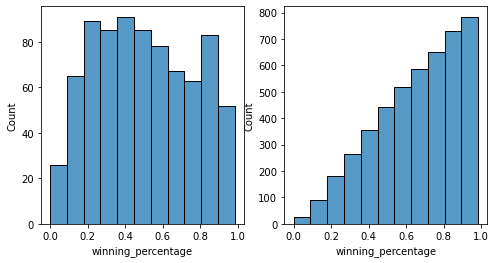

In [45]:
# sns.displot(data=pokemon, x='winning_percentage')
# displot para trabajar con distribucciones y sea born recomienda la mas adecuada
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data=pokemon_adj, x='winning_percentage')
plt.subplot(1,2,2)
sns.histplot(data=pokemon_adj, x='winning_percentage', cumulative=True)
plt.show()

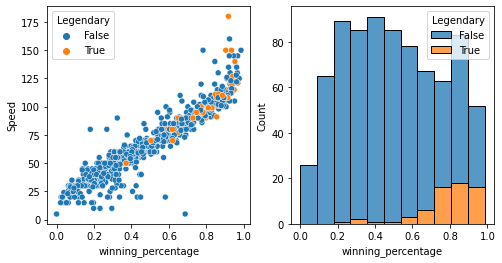

In [48]:
fig, axs= plt.subplots(1,2,figsize=(8,4))
sns.histplot(data=pokemon_adj, x='winning_percentage', hue='Legendary', ax=axs[1], multiple='stack')
sns.scatterplot(data=pokemon_adj, x='winning_percentage', y='Speed', hue='Legendary', ax=axs[0])
plt.show()

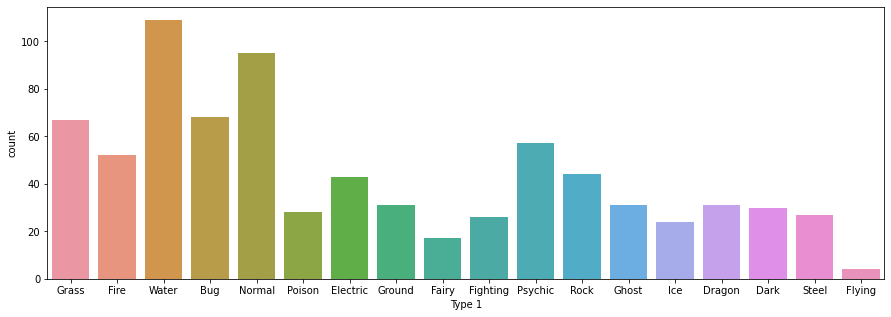

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(data=pokemon_adj, x='Type 1')
plt.show()

In [ ]:
# Seaborn set default theme
# sns.set_theme()

In [ ]:
# Matplotlib default theme
# plt.rcParams.update(plt.rcParamsDefault)